In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/content/Algerian_forest_fire_cleaned_dataset (2)")

In [3]:
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1.0,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2.0,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3.0,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4.0,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5.0,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['Unnamed: 0', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
#drop unwanted columns
df = df.drop(columns=['Unnamed: 0','day','month','year'])

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df['Classes'].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [9]:
##Encoding my classes columns
df['Classes']  = np.where(df['Classes'].str.contains('not fire'),0,1)

In [10]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [11]:
df['Classes'].value_counts()

,count
Classes,
1,137
0,106


In [13]:
##Split independent and dependent features
X = df.drop('FWI',axis=1)
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [15]:
Y = df['FWI']
Y

,FWI
0,0.5
1,0.4
2,0.1
3,0.0
4,0.5
...,...
238,6.5
239,0.0
240,0.2
241,0.7


In [16]:
##Test train split
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [23]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

#**Feature Selection** - based on correlation

In [24]:
###Based on Correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

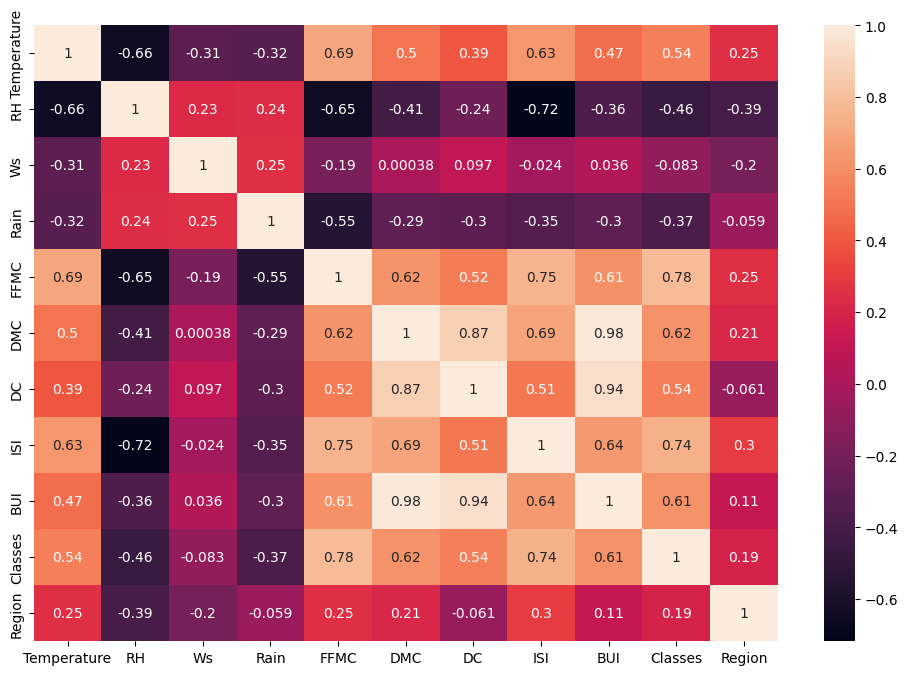

In [26]:
#Check with Multicollinearity
plt.figure(figsize=(12,8))
co = X_train.corr()
sns.heatmap(co, annot=True)

In [46]:
def correlation(dataset, threshold):
    corr = list()  # Set to store columns with high correlations
    corr_mat = dataset.corr()  # Generate correlation matrix

    # Iterate through the correlation matrix
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            # Check if the absolute correlation is above the threshold
            if abs(corr_mat.iloc[i, j]) > threshold: #it will change into absolue if i =  -24 abs(i) = 24.
                col = corr_mat.columns[i]  # Get the column name with high correlation
                corr.append(col)  # Add it to the set

    return corr


In [49]:
#Correlation Threshold --- set by Domain Expertise if they give 0.85 we need to remove these 4features from Dataset
corr_features = correlation(X_train, 0.85)
corr_features

['DC', 'BUI', 'BUI']

In [52]:
##Drop features which  more than threshold value 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [54]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
97,29,74,19,0.1,75.8,3.6,2.1,0,0
141,31,72,14,0.2,60.2,3.8,0.8,0,1
192,40,31,15,0.0,94.2,22.5,16.6,1,1
68,32,60,18,0.3,77.1,11.3,2.2,0,0
119,32,47,14,0.7,77.5,7.1,1.8,0,0


In [56]:
##Standardiztion
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()

In [60]:
#preprocessing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

#BoxPlot to understand the effect of scaler

Text(0.5, 1.0, 'Scaled')

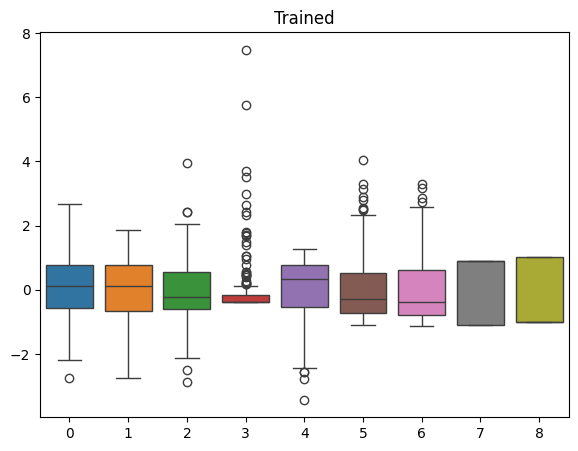

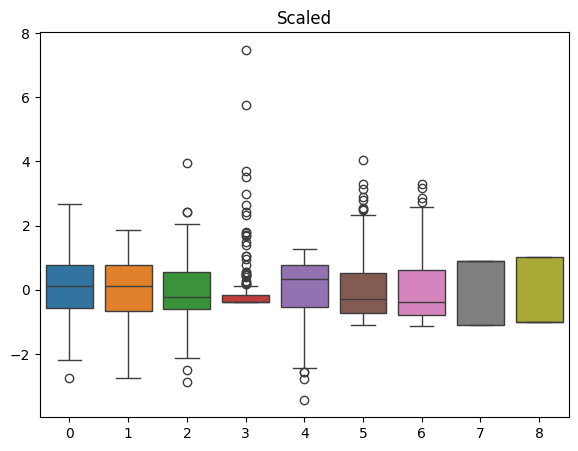

In [66]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title("Trained")
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title("Scaled")


#Linear Regression Model

In [70]:
#model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
regression = LinearRegression()

In [71]:
#training my model
regression.fit(X_train_scaled,Y_train)

LinearRegression()

In [96]:
#predicting my new data
y_pred = regression.predict(X_test_scaled)
y_pred

array([ 8.22340505e+00,  7.75252922e+00, -2.54117416e-01,  4.35589319e+00,
        6.69135945e+00,  1.36202538e+00,  2.03864111e+00,  7.79328670e+00,
        1.72547890e+00,  3.33158516e+00,  4.13723043e-01,  9.75001593e+00,
        9.33180880e+00,  1.70522541e+01,  1.85133518e+01,  1.24250301e+00,
        1.85818589e+00, -2.19341618e-02,  7.18794479e+00,  3.06137615e+00,
        1.43702876e+00,  2.31135272e-01,  6.57677437e+00,  3.31761969e-01,
        2.10846121e+01,  5.11915298e+00,  5.93220317e+00,  9.80969813e+00,
       -6.46764212e-02,  9.81330986e+00,  6.64475980e+00, -4.53909646e-01,
        1.04015941e+01,  1.45820244e+01,  1.47807316e+00,  4.33773546e-01,
        2.04109845e+00,  6.08454570e+00, -4.65467631e-01, -3.05185642e-01,
        6.68439528e+00,  1.79727675e+00,  8.59237254e+00, -2.66715046e-01,
        1.54439592e+01,  8.32647113e+00,  8.25849719e+00,  1.42038134e+00,
        1.29740729e+01,  1.21912915e+00,  2.95190998e+01,  5.55199228e+00,
        1.72874204e+01,  

Mean_squared_error: 0.6742766873791589
Mean_absolute_error: 0.5468236465249979
Root_mean_squared_error: 0.8211435242265258


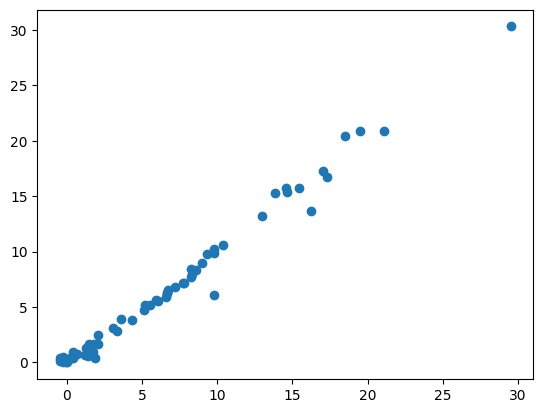

In [101]:
mse = mean_squared_error(y_pred,Y_test)
mae = mean_absolute_error(y_pred,Y_test)
rmse = np.sqrt(mse)
print("Mean_squared_error:", mse)
print("Mean_absolute_error:", mae)
print("Root_mean_squared_error:", rmse)
plt.scatter(y_pred,Y_test)

In [98]:
#r2 square
from sklearn.metrics import r2_score

In [99]:
score = r2_score(y_pred,Y_test)
score

0.9839977157632893

#Lasso Regression


Mean_squared_error: 2.2483458918974737
Mean_absolute_error: 1.133175994914408
Root_mean_squared_error: 1.4994485292591653


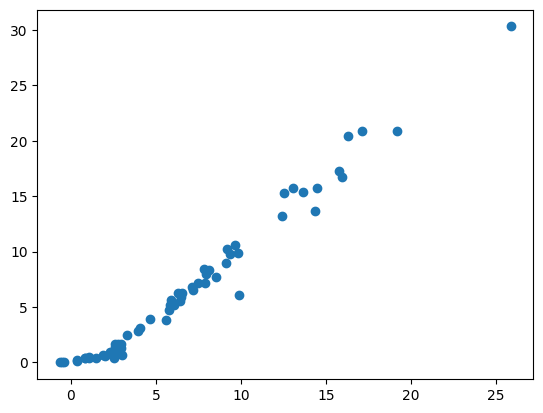

In [102]:
#Lasso model
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
Las = Lasso()
Las.fit(X_train_scaled,Y_train)
y_pred = Las.predict(X_test_scaled)
mse = mean_squared_error(y_pred,Y_test)
mae = mean_absolute_error(y_pred,Y_test)
rmse = np.sqrt(mse)
print("Mean_squared_error:", mse)
print("Mean_absolute_error:", mae)
print("Root_mean_squared_error:", rmse)
plt.scatter(y_pred,Y_test)

In [103]:
score = r2_score(y_pred,Y_test)
score

0.9264742326805692

#Ridge Regression

Mean_squared_error: 0.6949198918152065
Mean_absolute_error: 0.5642305340105689
Root_mean_squared_error: 0.8336185529456542


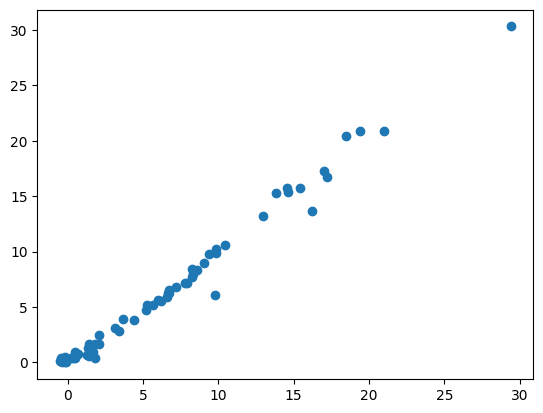

In [105]:
#Ridge model
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error
Ri = Ridge()
Ri.fit(X_train_scaled,Y_train)
y_pred = Ri.predict(X_test_scaled)
mse = mean_squared_error(y_pred,Y_test)
mae = mean_absolute_error(y_pred,Y_test)
rmse = np.sqrt(mse)
print("Mean_squared_error:", mse)
print("Mean_absolute_error:", mae)
print("Root_mean_squared_error:", rmse)
plt.scatter(y_pred,Y_test)

In [106]:
score = r2_score(y_pred,Y_test)
score

0.9834070933284212

#Elastic Net Regression

Mean_squared_error: 5.517251101025222
Mean_absolute_error: 1.8822353634895996
Root_mean_squared_error: 2.348882947493387


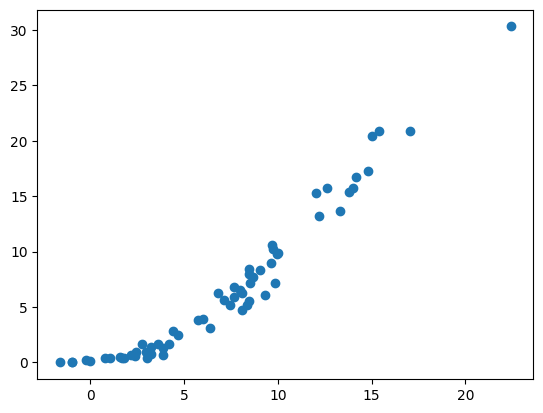

In [107]:
#Elastic Net model
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error
El = ElasticNet()
El.fit(X_train_scaled,Y_train)
y_pred = El.predict(X_test_scaled)
mse = mean_squared_error(y_pred,Y_test)
mae = mean_absolute_error(y_pred,Y_test)
rmse = np.sqrt(mse)
print("Mean_squared_error:", mse)
print("Mean_absolute_error:", mae)
print("Root_mean_squared_error:", rmse)
plt.scatter(y_pred,Y_test)

In [108]:
score = r2_score(y_pred,Y_test)
score

0.7814447243400926

#Lasso options and Cross Validation (CV)

In [111]:
from sklearn.linear_model import LassoCV
Lasso = LassoCV(cv=5)

In [113]:
#Training my model
Lasso.fit(X_train_scaled,Y_train)

LassoCV(cv=5)

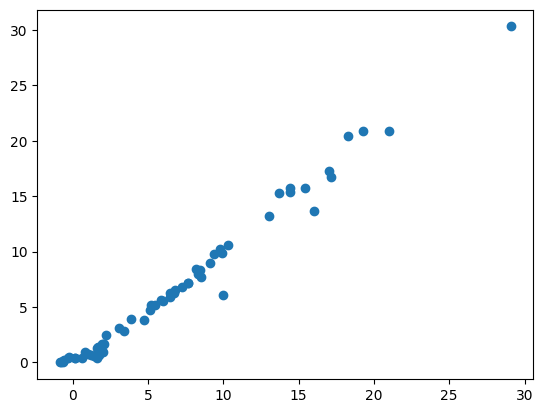

In [126]:
pred_las = Lasso.predict(X_test_scaled)
plt.scatter(pred_las,Y_test)

In [118]:
score = r2_score(pred_las,Y_test)
score

0.980851982434192

In [120]:
Lasso.alpha_

0.05725391318234408

In [121]:
Lasso.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

#mse_path_ndarray of shape (n_alphas, n_folds)
#Mean square error for the test set on each fold, varying alpha.

In [124]:
Lasso.mse_path_ #alphas =100, CV=5 mse_path=500 (100*5)

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

#Ridge options and Cross Validation (CV)

In [127]:
from sklearn.linear_model import RidgeCV
Ridge = RidgeCV(cv=5)

In [128]:
#train my data to ridge model
Ridge.fit(X_train_scaled,Y_train)

RidgeCV(cv=5)

In [130]:
#predict new data
r_pred = Ridge.predict(X_test_scaled)
r_pred

array([ 8.23695957,  7.77133489, -0.20576373,  4.38641746,  6.73014882,
        1.38083778,  2.09821574,  7.89573609,  1.68710448,  3.39608166,
        0.45955107,  9.77115691,  9.35289622, 17.03184252, 18.46891974,
        1.31920963,  1.83197436, -0.12967473,  7.18616187,  3.15029834,
        1.4415705 ,  0.20532056,  6.60901914,  0.34619299, 20.97777968,
        5.22692975,  5.97066219,  9.82599838, -0.18171193,  9.83698303,
        6.65050786, -0.43256887, 10.40995342, 14.57517502,  1.52182034,
        0.47799404,  2.09598786,  6.18530003, -0.51720703, -0.27108924,
        6.74656177,  1.8115675 ,  8.60302337, -0.34697492, 15.41467762,
        8.34164636,  8.27783782,  1.41852757, 12.97837116,  1.24905696,
       29.40913561,  5.66093325, 17.23898525, 19.38721803, 13.82278407,
       16.19164908,  0.70419803,  9.05107798,  3.6760472 , 14.63186999,
        5.27050843])

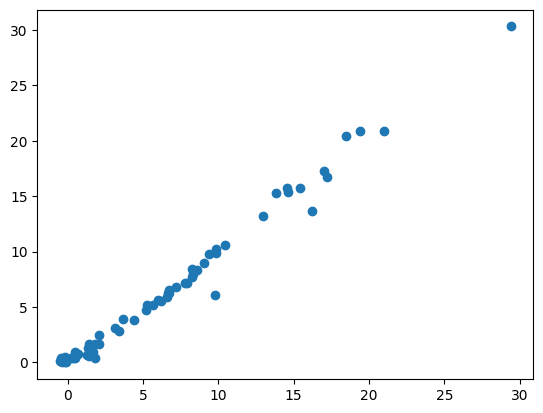

In [131]:
#ploting
plt.scatter(r_pred,Y_test)

In [132]:
#r2_score
score = r2_score(r_pred,Y_test)
score

0.9834070933284212

In [133]:
Ridge.alpha_

1.0

In [135]:
Ridge.alphas

(0.1, 1.0, 10.0)

In [136]:
Ridge.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

#Elastic Net options and Cross Validation (CV)

In [137]:
from sklearn.linear_model import ElasticNetCV
El = ElasticNetCV(cv=5)

In [138]:
#train my data to ridge model
El.fit(X_train_scaled,Y_train)

ElasticNetCV(cv=5)

In [142]:
#predict new data
E_pred = El.predict(X_test_scaled)
E_pred

array([ 8.26896303,  7.80499035, -0.10373519,  4.5910001 ,  6.88725274,
        1.59410811,  2.35512483,  8.0623476 ,  1.72415002,  3.53713054,
        0.6324586 ,  9.86752845,  9.43037004, 16.93741658, 18.24537235,
        1.65750426,  1.70187606, -0.64660717,  7.25494999,  3.39769372,
        1.6585457 ,  0.11316128,  6.66222016,  0.2768868 , 20.66780763,
        5.47501303,  6.05587139,  9.84868106, -0.65326652,  9.93266416,
        6.72851251, -0.29425171, 10.39747097, 14.48835483,  1.70083377,
        0.73634118,  2.25453683,  6.37570352, -0.71507088, -0.36129277,
        6.8083341 ,  1.96274355,  8.60448104, -0.79781122, 15.32067065,
        8.39541208,  8.43742252,  1.41818555, 13.00237268,  1.28988758,
       28.93275959,  5.88819725, 17.04972357, 19.1125176 , 13.71477759,
       16.09820311,  0.99493652,  9.16486312,  3.91448039, 14.57731138,
        5.50092909])

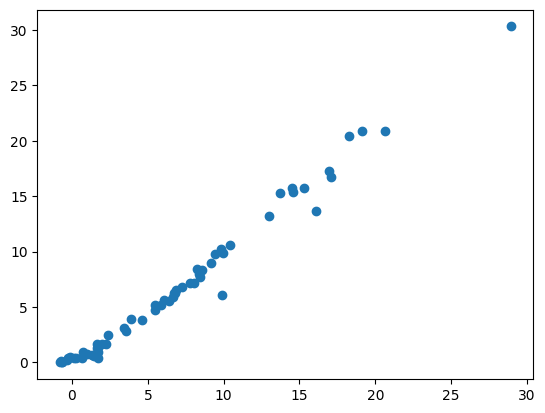

In [143]:
#ploting
plt.scatter(E_pred,Y_test)

In [144]:
#r2_score
score = r2_score(r_pred,Y_test)
score

0.9799084998743879

In [145]:
#aplhas
El.alpha_

0.04311146156383891

In [147]:
El.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11